In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

c:\Users\51man\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(7*7*32, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [6]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
losses=[]

In [8]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    running_loss=0
    for images, labels in train_loader:
        images = images
        labels = labels

        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(running_loss)
    print ('Epoch [{}/{}] Loss: {:.4f}'.format(epoch+1, num_epochs,loss.item()))

Epoch [1/5] Loss: 0.0618
Epoch [2/5] Loss: 0.0254
Epoch [3/5] Loss: 0.1187
Epoch [4/5] Loss: 0.0876
Epoch [5/5] Loss: 0.0295


In [9]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))


Accuracy of the model on the test images: 98.78 %


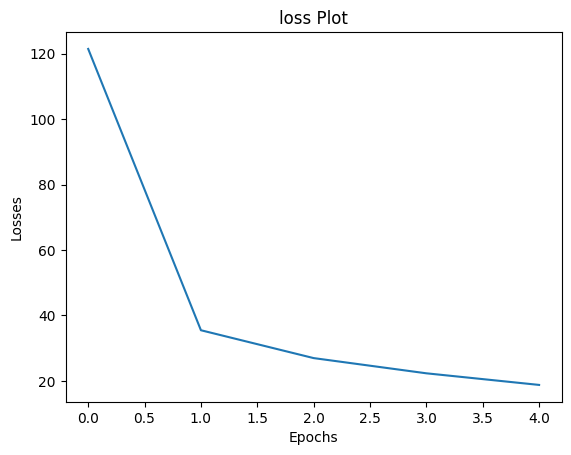

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(num_epochs),losses)
plt.title("loss Plot")
plt.ylabel('Losses')
plt.xlabel('Epochs')
plt.show()

In [ ]:
from torchviz import make_dot
dot = make_dot(outputs, params=dict(model.named_parameters()))

dot.render("simple_cnn", format="png")